# Credit Risk Modelling - PD Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # set the default style of the graphs to the seaborn style. 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn import linear_model
import scipy.stats as stat
from sklearn.metrics import roc_curve, roc_auc_score

import pickle

# `PD Model`

In [ ]:
loan_data_inputs_train = pd.read_csv('/content/drive/MyDrive/Credit Risk Modelling/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('/content/drive/MyDrive/Credit Risk Modelling/loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('/content/drive/MyDrive/Credit Risk Modelling/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('/content/drive/MyDrive/Credit Risk Modelling/loan_data_targets_test.csv', index_col = 0)

### Selecting the Features

In [ ]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train[['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [ ]:
inputs_train_with_ref_cat.shape

(373028, 126)

In [ ]:
# the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
len(ref_categories)

22

In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
inputs_train.shape, loan_data_targets_train.shape

((373028, 104), (373028, 1))

In [ ]:
reg = LogisticRegression() # instance of an object from the 'LogisticRegression' class.
reg.fit(inputs_train, loan_data_targets_train) # fit the data into the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# display the Intercept and coefficients
print('Intercept- ',reg.intercept_)
print('Coefficient- ',reg.coef_)

Intercept-  [-1.33114802]
Coefficient-  [[ 1.16012978  0.9060709   0.70887543  0.51906665  0.33683541  0.1449069
   0.09080695  0.10678467  0.02967001  0.05523126  0.05659134  0.05939306
   0.07495672  0.13242949  0.09933701  0.18111117  0.22490211  0.22033152
   0.25913738  0.3166083   0.51751621  0.08806279 -0.01076066  0.30677784
   0.20251685  0.21414719  0.26666307  0.05442766  0.07806635  0.10016899
   0.12528906  0.08958696  0.06084275  0.12334264  1.07506131  0.87435868
   0.77403073  0.57294535  0.41064593  0.165873   -0.0698239   0.85052983
   0.53833733  0.28958736  0.10064173  0.05609966  0.03781207  0.0795331
   0.11952414  0.12623129  0.07425905  0.03129651  0.63483938  0.49144005
   0.28206423 -0.0110436  -0.10865476 -0.134329   -0.14973167 -0.15433271
  -0.11935006 -0.20972273  0.12264072  0.17844693 -0.02093593  0.02535353
   0.21759694  0.03468768  0.00270172  0.00119124  0.0144703   0.03487826
   0.06100559  0.2016932  -0.06015976  0.009757    0.10684552  0.17593155


In [ ]:
feature_name = inputs_train.columns.values # Stores the names of the columns of a dataframe in a variable.

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-1.331148
1,grade:A,1.160130
2,grade:B,0.906071
3,grade:C,0.708875
4,grade:D,0.519067
...,...,...
100,mths_since_last_record:3-20,0.435642
101,mths_since_last_record:21-31,0.364505
102,mths_since_last_record:32-80,0.527093
103,mths_since_last_record:81-86,0.201896


## Build a Logistic Regression Model with P-Values

In [ ]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
reg2 = LogisticRegression_with_p_values() # create an instance of an object from the 'LogisticRegression_with_p_values()' class.
reg2.fit(inputs_train, loan_data_targets_train) # fit the data into the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
feature_name = inputs_train.columns.values # Stores the names of the columns of a dataframe in a variable.
# Summary Table.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.331148
1,grade:A,1.160130
2,grade:B,0.906071
3,grade:C,0.708875
4,grade:D,0.519067
...,...,...
100,mths_since_last_record:3-20,0.435642
101,mths_since_last_record:21-31,0.364505
102,mths_since_last_record:32-80,0.527093
103,mths_since_last_record:81-86,0.201896


In [ ]:
p_values = reg2.p_values # store p-vales in a variable

In [ ]:
# Add the intercept
p_values = np.append(np.nan, np.array(p_values))

In [ ]:
summary_table['p_values'] = p_values

In [ ]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.331148,NaN
1,grade:A,1.160130,1.696016e-37
2,grade:B,0.906071,1.035141e-49
3,grade:C,0.708875,6.528209e-36
4,grade:D,0.519067,4.991254e-22
...,...,...,...
100,mths_since_last_record:3-20,0.435642,6.069798e-04
101,mths_since_last_record:21-31,0.364505,1.779365e-03
102,mths_since_last_record:32-80,0.527093,5.036589e-09
103,mths_since_last_record:81-86,0.201896,5.749068e-02


In [ ]:
# export model to a 'SAV' file with file name 'pd_model.sav'.
pickle.dump(reg2, open('pd_model.sav', 'wb'))

### Removing the less statistically significant variables

In [ ]:
# remove features for which the coefficients for all or almost all of the dummy variables are not statistically significant.
# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, drop the variables with variable names in the list with reference categories. 
inputs_train.shape

(373028, 84)

In [ ]:
reg2 = LogisticRegression_with_p_values() # create an instance of an object from the 'LogisticRegression_with_p_values()' class.
reg2.fit(inputs_train, loan_data_targets_train) # fit the data into the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
feature_name = inputs_train.columns.values # Stores the names of the columns of a dataframe in a variable.

# Summary Table.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.331148
1,grade:A,1.123687
2,grade:B,0.878901
3,grade:C,0.684782
4,grade:D,0.496920
...,...,...
80,mths_since_last_record:3-20,0.440623
81,mths_since_last_record:21-31,0.350691
82,mths_since_last_record:32-80,0.502918
83,mths_since_last_record:81-86,0.175836


In [ ]:
# export model to a 'SAV' file with file name 'pd_model.sav'.
pickle.dump(reg2, open('pd_model.sav', 'wb'))

## PD Model Validation (Test)

In [ ]:
# remove features for which the coefficients for all or almost all of the dummy variables are not statistically significant.
# Variables
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis= 1)

In [ ]:
y_hat_test = reg2.model.predict(inputs_test) # Calculates the predicted values for the dependent variable (targets)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test) # Calculates the predicted probabilities for the dependent variable (targets)
y_hat_test_proba

array([[0.07569464, 0.92430536],
       [0.15076079, 0.84923921],
       [0.11465314, 0.88534686],
       ...,
       [0.02678685, 0.97321315],
       [0.04020901, 0.95979099],
       [0.04763361, 0.95236639]])

In [ ]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1] # store probabilities in variable

In [ ]:
loan_data_targets_test_temp = loan_data_targets_test

In [ ]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True) # reset the index of a dataframe.

In [ ]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1) # Concatenate two dataframes.

In [ ]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba'] # columns renamed

In [ ]:
df_actual_predicted_probs.index = loan_data_targets_test_temp.index

In [ ]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.924305
1,1,0.849239
2,1,0.885347
3,1,0.940635
4,1,0.968664


In [ ]:
# Summary Table.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.331148
1,grade:A,1.123687
2,grade:B,0.878901
3,grade:C,0.684782
4,grade:D,0.496920
...,...,...
80,mths_since_last_record:3-20,0.440623
81,mths_since_last_record:21-31,0.350691
82,mths_since_last_record:32-80,0.502918
83,mths_since_last_record:81-86,0.175836


### Accuracy and Area under the Curve

In [ ]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

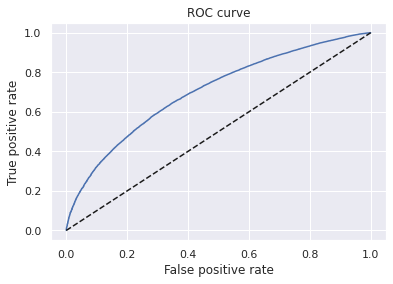

In [ ]:
plt.plot(fpr, tpr)
# plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# name the x-axis "True positive rate".
plt.title('ROC curve')
# name the graph "ROC curve".

In [ ]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7022080045745732

## Applying the PD Model
### Calculating PD of individual accounts
### Creating a Scorecard

In [ ]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [ ]:
summary_table.shape

(85, 2)

In [ ]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.331148,NaN
1,1,grade:A,1.123687,NaN
2,2,grade:B,0.878901,NaN
3,3,grade:C,0.684782,NaN
4,4,grade:D,0.496920,NaN
...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN
98,13,annual_inc:<20K,0.000000,NaN
99,14,dti:>35,0.000000,NaN
100,15,mths_since_last_delinq:0-3,0.000000,NaN


In [ ]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.331148,NaN,Intercept
1,1,grade:A,1.123687,NaN,grade
2,2,grade:B,0.878901,NaN,grade
3,3,grade:C,0.684782,NaN,grade
4,4,grade:D,0.496920,NaN,grade
...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq
98,13,annual_inc:<20K,0.000000,NaN,annual_inc
99,14,dti:>35,0.000000,NaN,dti
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq


In [ ]:
min_score = 300
max_score = 850

In [ ]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating t

Original feature name
Intercept                     -1.331148
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.081524
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071758
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011192
Name: Coefficients, dtype: float64

In [ ]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.4956216425640834

In [ ]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                     -1.331148
acc_now_delinq                 0.180379
addr_state                     0.521970
annual_inc                     0.552385
dti                            0.384438
emp_length                     0.125859
grade                          1.123687
home_ownership                 0.106243
initial_list_status            0.053822
inq_last_6mths                 0.666219
int_rate                       0.883099
mths_since_earliest_cr_line    0.129363
mths_since_issue_d             1.084234
mths_since_last_delinq         0.183077
mths_since_last_record         0.502918
purpose                        0.301872
term                           0.078941
verification_status            0.085711
Name: Coefficients, dtype: float64

In [ ]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.633068708224608

In [ ]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef) 
# Transforming the calculated scores into Standard Scores (between 300 and 850)

In [ ]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, multiply that by the difference between the maximum score and the minimum score.
# Then, add minimum score. 
df_scorecard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.331148,NaN,Intercept,312.689637
1,1,grade:A,1.123687,NaN,grade,86.695841
2,2,grade:B,0.878901,NaN,grade,67.809897
3,3,grade:C,0.684782,NaN,grade,52.832982
4,4,grade:D,0.496920,NaN,grade,38.338907
...,...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
98,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
99,14,dti:>35,0.000000,NaN,dti,0.000000
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [ ]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.331148,NaN,Intercept,312.689637,313.0
1,1,grade:A,1.123687,NaN,grade,86.695841,87.0
2,2,grade:B,0.878901,NaN,grade,67.809897,68.0
3,3,grade:C,0.684782,NaN,grade,52.832982,53.0
4,4,grade:D,0.496920,NaN,grade,38.338907,38.0
...,...,...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0
98,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
99,14,dti:>35,0.000000,NaN,dti,0.000000,0.0
100,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

851.0

In [ ]:
# One has to be subtracted from the maximum score
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard[df_scorecard['Difference'] == df_scorecard['Difference'][1:].min()]

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
78,78,mths_since_last_delinq:>=57,0.136085,NaN,mths_since_last_delinq,10.499377,10.0,-0.499377


In [ ]:
df_scorecard.nlargest(15, 'Difference')

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
75,75,mths_since_last_delinq:Missing,0.110408,NaN,mths_since_last_delinq,8.518346,9.0,0.481654
38,38,mths_since_issue_d:42-48,0.577200,NaN,mths_since_issue_d,44.532753,45.0,0.467247
56,56,annual_inc:30K-40K,-0.018932,NaN,annual_inc,-1.460660,-1.0,0.460660
27,27,purpose:major_purch__car__home_impr,0.266264,NaN,purpose,20.543062,21.0,0.456938
15,15,addr_state:RI_MA_DE_SD_IN,0.097894,NaN,addr_state,7.552799,8.0,0.447201
76,76,mths_since_last_delinq:4-30,0.136942,NaN,mths_since_last_delinq,10.565491,11.0,0.434509
83,83,mths_since_last_record:81-86,0.175836,NaN,mths_since_last_record,13.566297,14.0,0.433703
20,20,addr_state:KS_SC_CO_VT_AK_MS,0.318555,NaN,addr_state,24.577515,25.0,0.422485
70,70,dti:10.5-16.1,0.241128,NaN,dti,18.603721,19.0,0.396279
22,22,verification_status:Not Verified,0.085711,NaN,verification_status,6.612875,7.0,0.387125


In [ ]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']

In [ ]:
# Subtracting '1' from the values which were rounded up the most
df_scorecard['Score - Final'][75] = 8
df_scorecard['Score - Final'][38] = 44
df_scorecard['Score - Final'][56] = -2
df_scorecard['Score - Final'][27] = 20
df_scorecard['Score - Final'][15] = 7
df_scorecard['Score - Final'][76] = 10
df_scorecard['Score - Final'][83] = 13
df_scorecard['Score - Final'][20] = 24
df_scorecard['Score - Final'][70] = 18
df_scorecard['Score - Final'][22] = 6
df_scorecard['Score - Final']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

0      313.0
1       87.0
2       68.0
3       53.0
4       38.0
       ...  
97       0.0
98       0.0
99       0.0
100      0.0
101      0.0
Name: Score - Final, Length: 102, dtype: float64

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

### Calculating Credit Score

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat # create a new dataframe
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1) # insert '1' in all the rows for 'Intercept' column
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# # make sure all the column names and scorecard features are in the same order

In [ ]:
scorecard_scores = df_scorecard['Score - Final']

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape, scorecard_scores.shape

((93257, 102), (102,))

In [ ]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [ ]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# multiply the values of each row of the dataframe by the values of each column of the variable using 'dot' method and sum them.

In [ ]:
y_scores

,0
362514,612.0
288564,552.0
213591,576.0
263083,632.0
165001,683.0
...,...
115,571.0
296284,678.0
61777,695.0
91763,662.0


### From Credit Score to PD

In [ ]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# divide the difference between the scores and the minimum score by the difference between the maximum score and the minimum score.
# Then, multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients and add the minimum sum of coefficients.
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# divide an exponent raised to sum of coefficients from score by an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

,0
362514,0.927459
288564,0.854534
213591,0.889110
263083,0.943081
165001,0.969779


In [ ]:
y_hat_test_proba[0: 5]

array([0.92430536, 0.84923921, 0.88534686, 0.94063508, 0.96866433])

In [ ]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.924305
1    0.849239
2    0.885347
3    0.940635
4    0.968664
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

In [ ]:
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [ ]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5857790836076648

In [ ]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

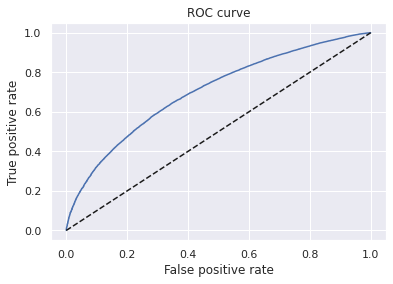

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [ ]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1) # concatenate 3 dataframes along the columns.
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992628,0.000000,0.000000
1,0.992628,0.000000,0.000012
2,0.990697,0.000000,0.000120
3,0.990653,0.000098,0.000120
4,0.989823,0.000098,0.000421


In [ ]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [ ]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [ ]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3250.0
1,0.992628,0.000000,0.000012,794.0
2,0.990697,0.000000,0.000120,776.0
3,0.990653,0.000098,0.000120,775.0
4,0.989823,0.000098,0.000421,769.0


In [ ]:
df_cutoffs['Score'][0] = max_score

In [ ]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992628,0.000000,0.000012,794.0
2,0.990697,0.000000,0.000120,776.0
3,0.990653,0.000098,0.000120,775.0
4,0.989823,0.000098,0.000421,769.0


### Create a function `n_approved()` 
It assigns a value of 1 if a predicted probability is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
Then it sums the column.
The function will return the number of rows with estimated probabilites greater than the threshold.

In [ ]:
# It assigns a value of 1 if a predicted probability is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# The function will return the number of rows with estimated probabilites greater than the threshold.
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# apply the 'n_approved' function to a threshold, it will return the number of approved applications.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# calculate the number of rejected applications for each threshold (difference between the total number of applications and the approved applications)
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equals the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [ ]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [ ]:
df_scorecard.to_csv('df_scorecard.csv')